Notebook to play with WOD data using the wodpy package

WOD data
* http://www.nodc.noaa.gov/OC5/WOD/datageo.html

wodpy package
* https://github.com/BillMills/wodpy



In [7]:
from wodpy import wod

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import netCDF4 as nc
from salishsea_tools import viz_tools, tidetools
import numpy as np
import glob
import os
import datetime
from salishsea_tools.nowcast import analyze
import comparisons

%matplotlib inline

In [8]:
#make plots pretty
sns.set_style('darkgrid')

#Load Model Grid

In [3]:
f=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=f.variables['Bathymetry'][:]
X=f.variables['nav_lon'][:]
Y=f.variables['nav_lat'][:]

#Load WOD observations

Experiment with functions to manipulate the data.

In [4]:
def read_file_to_dataframe(filename):
    """Reads a WOD file (filename) and returns data as a dataframe.
    data inlcudes columns Temperature, Salinity, Depth, Year, Month, Day, Longitude, Latitude, Datetime"""
    
    file = open(filename)
    
    #empty list for gatherting profiles.
    list_data=[]
    
    #loop through profiles
    profile = wod.WodProfile(file)
    while not profile.is_last_profile_in_file(file):
        year = profile.year()
        lat = profile.latitude()
        lon = profile.longitude()
        s=profile.s()
        d=profile.z()
        t=profile.t()
        month = profile.month()
        day = profile.day()
        date = datetime.datetime(year, month, day)
        tmp={'Year': year, 'Month': month, 'Day': day, 'Longitude': lon, 'Latitude': lat,
            'Salinity': s, 'Temperature': t, 'Depth': d, 'Datetime': date} 
        list_data.append(tmp)
        profile = wod.WodProfile(file)
        
    #again for last profile
    year = profile.year()
    lat = profile.latitude()
    lon = profile.longitude()
    s=profile.s()
    d=profile.z()
    t=profile.t()
    month = profile.month()
    day = profile.day()
    tmp={'Year': year, 'Month': month, 'Day': day, 'Longitude': lon, 'Latitude': lat,
        'Salinity': s, 'Temperature': t, 'Depth': d} 
    list_data.append(tmp)

    #convert to data frame    
    data = pd.DataFrame(list_data)     
    
    return data

In [5]:
data = read_file_to_dataframe('/ocean/nsoontie/MEOPAR/WOD/CTDS7412')    

Isolate region and plot

In [9]:
#define region and isolate

lon_min=-123.4; lat_min=48.3;
lon_max=-123; lat_max=48.85;

data_sog = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

Isolate time period

In [10]:
#define time period and isolate
sdt = datetime.datetime(2000,1,1)
edt = datetime.datetime(2015,12,31)

data_recent = comparisons.isolate_time_period(data_sog, sdt, edt)

Examine data by plotting

(48.3, 48.85)

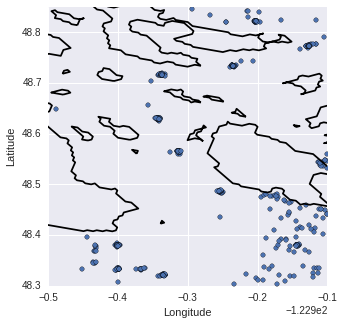

In [11]:

fig,axm = plt.subplots(1,figsize=(5,5))
data_recent.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,f,coords='map')
axm.set_xlim([lon_min,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f516ff3a8d0>]], dtype=object)

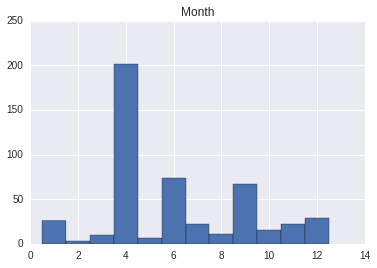

In [12]:
data_recent.hist('Month',bins=np.arange(0.5,13.5))

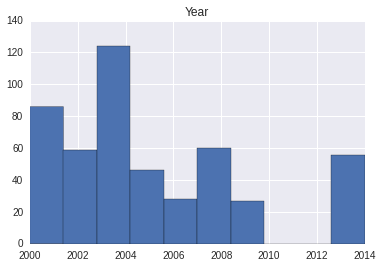

In [13]:
data_recent.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

#Model comparisons

Plan: 
* Compare this data set with spin-up year and nowcasts. 
* Spin-up year uses climatology for rivers so shouldn't need to worry as much about river discharge.
* Maybe it is better to avoid comparisons during the high flow months due to the interannual variability.

In [16]:
paths = {'nowcast': '/data/dlatorne/MEOPAR/SalishSea/nowcast/',
        'spinup': '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/'}
zmax=200

November

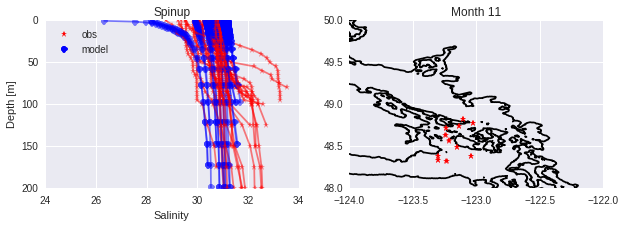

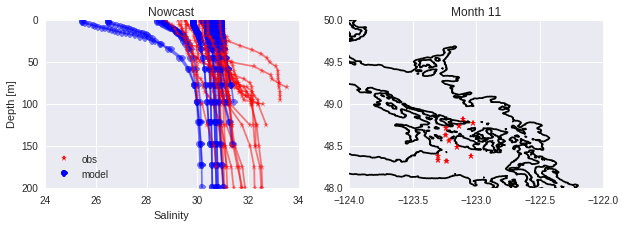

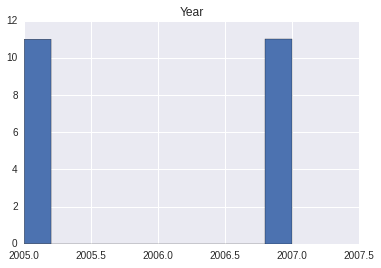

In [18]:
month=11
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax,vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2014,'Salinity',data_recent,paths['nowcast'],zmax=zmax,vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

December

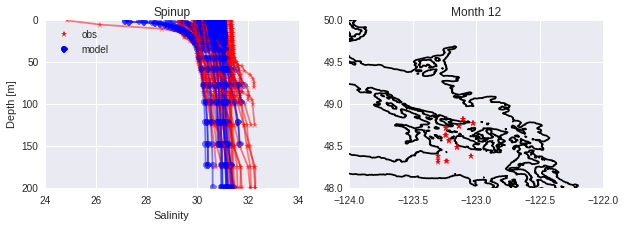

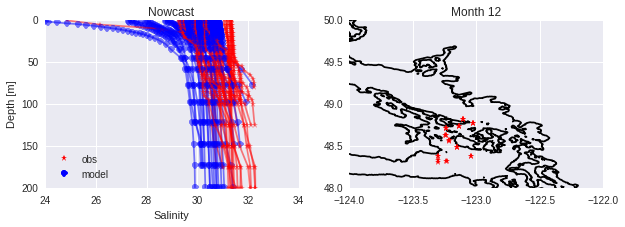

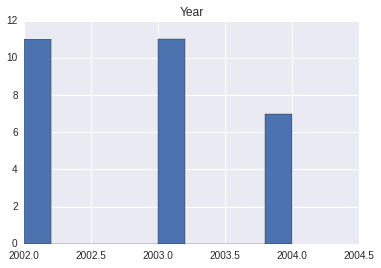

In [19]:
month=12
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax,vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2014,'Salinity',data_recent,paths['nowcast'],zmax=zmax,vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

January

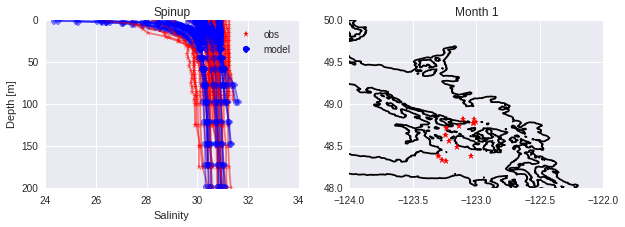

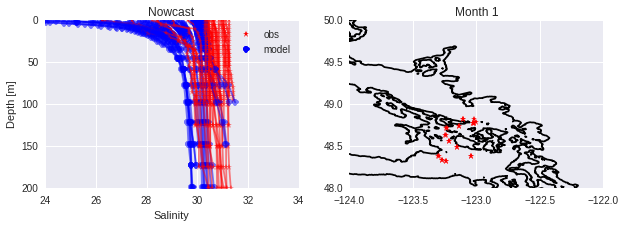

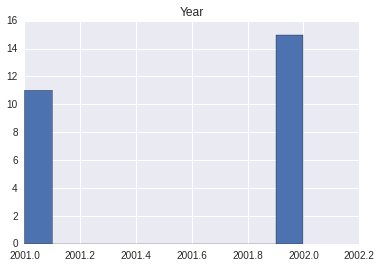

In [21]:
month=1
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax,vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],zmax=zmax,vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

February

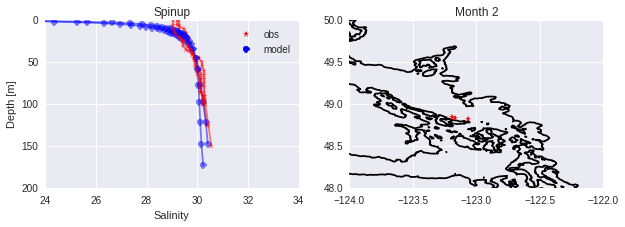

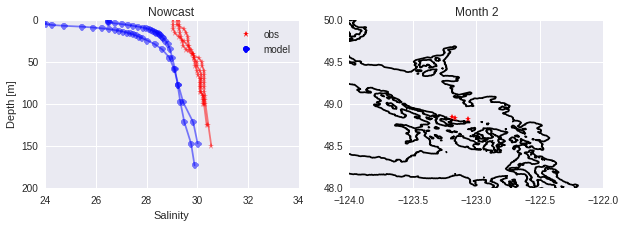

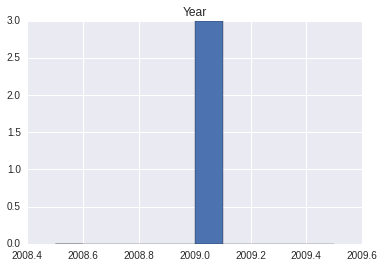

In [22]:
month=2
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax, vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],zmax=zmax, vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

March

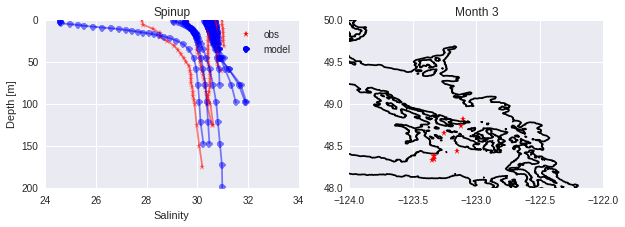

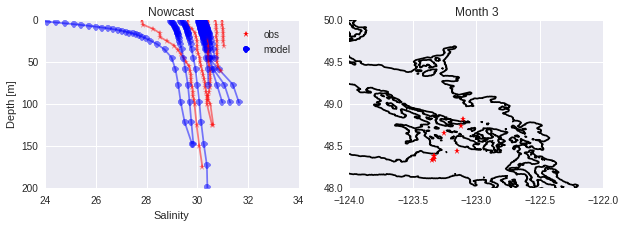

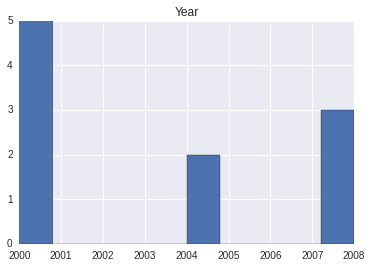

In [23]:
month=3
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax,vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],zmax=zmax,vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

April

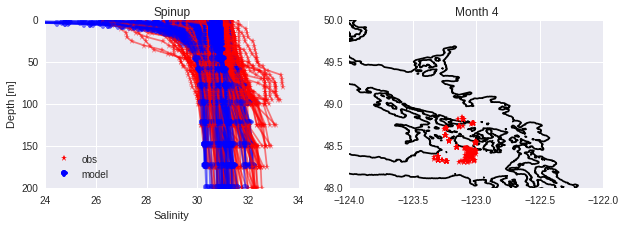

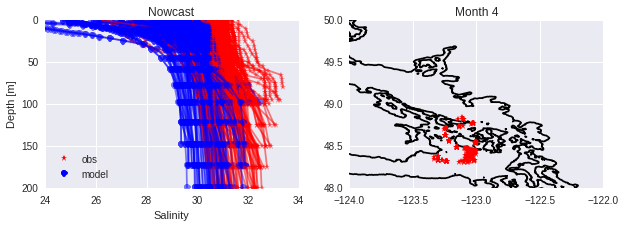

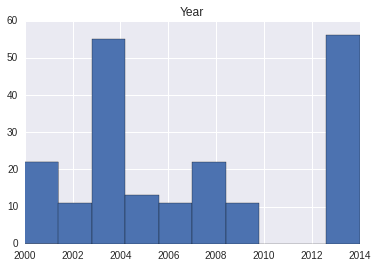

In [24]:
month=4
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax,vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],zmax=zmax, vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

Note: large April discharge in 2015 so expecting model nowcasts to be much fresher. But why is spinup so fresh?

May

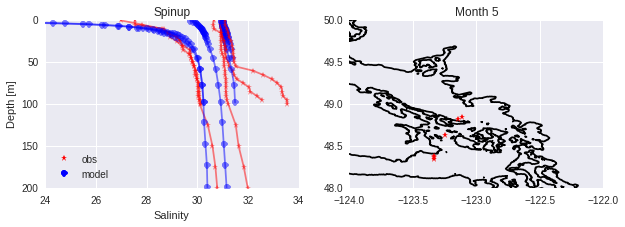

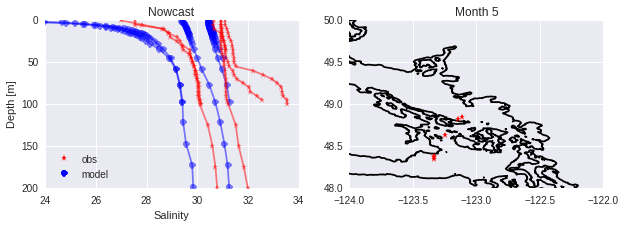

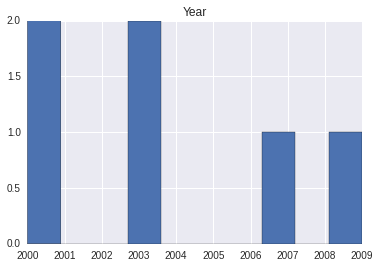

In [25]:
month=5
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],zmax=zmax, vmin=24,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],zmax=zmax, vmin=24,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

June

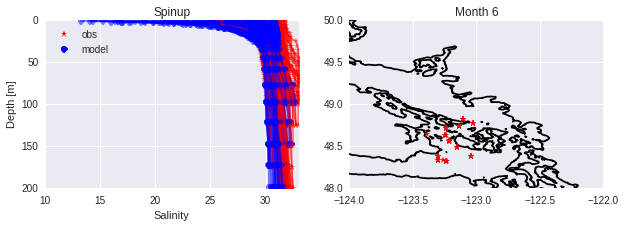

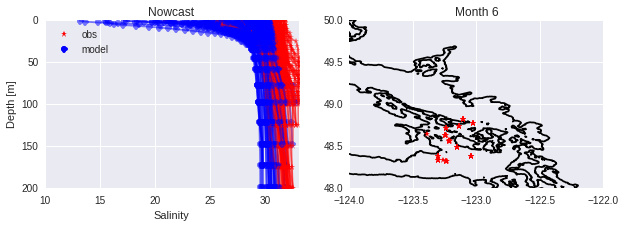

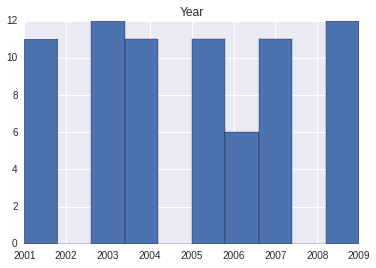

In [29]:
month=6
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],vmin=10,zmax=zmax,vmax=33)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],vmin=10,zmax=zmax,vmax=33)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

Starting to get into the large discharge time. It might be harder to make fair comparisons here because there is so much interannual variability in the discharge. Will think about this...

July

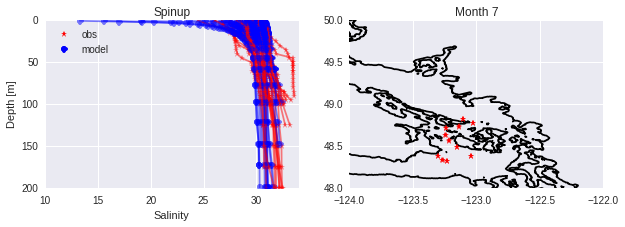

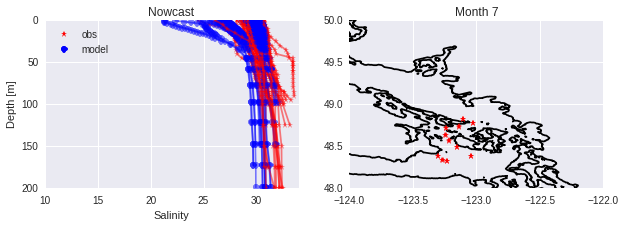

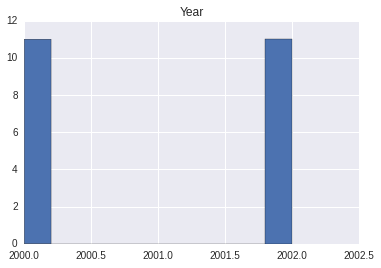

In [30]:
month=7
fig=comparisons.compare_model_obs(month,2003,'Salinity',data_recent,paths['spinup'],vmin=10,zmax=zmax,vmax=34)
fig=comparisons.compare_model_obs(month,2015,'Salinity',data_recent,paths['nowcast'],vmin=10,zmax=zmax,vmax=34)
data_month=data_recent[data_recent['Month']==month]
data_month.hist('Year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

I think that some of the data overlaps with the IOS data.